<h1>Making use of a template to estimate correlation</h1>

author: indranil

There are faster implementaions of the codes, use those if necessary. The notebook is an attempt to understand how the individual functions work. If you are benefitted by this notebook, make sure to pay the author for a cup of coffee.

In [1]:
import numpy as np

arr1 = np.array([3, 2, 4, 1, 3, 8, 4, 0, 3, 8, 0, 7, 7, 7, 1, 2])

template = np.array([3,7,5])

print(arr1)

len_padding = 1
padded_arr1 = np.zeros(len(arr1) + 2 * len_padding)

padded_arr1[len_padding : len(arr1) + len_padding] = arr1[:]

padded_arr1[0 : len_padding] = arr1[0]
padded_arr1[- len_padding : ] = arr1[len(arr1) - 1]

print(padded_arr1)

corr_arr = np.zeros(len(arr1))

for i in range(len(arr1)):

    sum_val = 0
    img_sq_val = 0
    template_sq_val = 0

    for j in range(len(template)):
    
        sum_val += (padded_arr1[i + j * len_padding] * template[j])
        img_sq_val += padded_arr1[i + j * len_padding] ** 2
        template_sq_val += template[j] ** 2

    corr_arr[i] += sum_val / (np.sqrt(img_sq_val) * np.sqrt(template_sq_val))

print(corr_arr)

print(np.argmax(corr_arr))

[3 2 4 1 3 8 4 0 3 8 0 7 7 7 1 2]
[3. 3. 2. 4. 1. 3. 8. 4. 0. 3. 8. 0. 7. 7. 7. 1. 2. 2.]
[0.93607275 0.87645659 0.93414848 0.73190244 0.81662951 0.988974
 0.6381449  0.592727   0.78366303 0.83505077 0.60921943 0.93138063
 0.95058638 0.82737924 0.56760691 0.98787834]
5


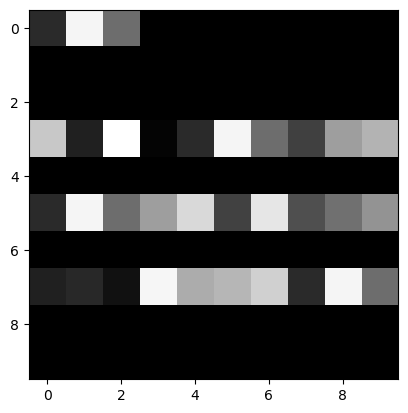

In [9]:
from matplotlib import pyplot as plt
from matplotlib import image as img

import random

image = np.zeros((10, 10), dtype = float)

template = np.array([random.randint(0,256) for i in range(3)])

# The header contains the template array
image[0][0:3] += template

image[3] += np.array([random.randint(0,256) for i in range(10)])
image[3][4:7] = template

image[5] += np.array([random.randint(0,256) for i in range(10)])
image[5][0:3] = template

image[7] += np.array([random.randint(0,256) for i in range(10)])
image[7][7:10] = template

plt.figure()
plt.imshow(image, cmap='grey')
plt.show()

In [10]:
len_padding = 1
padded_arr1 = np.zeros(len(arr1) + 2 * len_padding)

arr1 = image[3]

padded_arr1[len_padding : len(arr1) + len_padding] = arr1[:]

padded_arr1[0 : len_padding] = arr1[0]
padded_arr1[- len_padding : ] = arr1[len(arr1) - 1]

print(padded_arr1)

corr_arr = np.zeros(len(arr1))

for i in range(len(arr1)):

    sum_val = 0
    img_sq_val = 0
    template_sq_val = 0

    for j in range(len(template)):
    
        sum_val += (padded_arr1[i + j * len_padding] * template[j])
        img_sq_val += padded_arr1[i + j * len_padding] ** 2
        template_sq_val += template[j] ** 2

    corr_arr[i] += np.nan_to_num(sum_val / (np.sqrt(img_sq_val) * np.sqrt(template_sq_val)))

print(corr_arr)

print(np.argmax(corr_arr))

[198. 198.  32. 253.   4.  42. 243. 108.  64. 157. 177. 177.]
[0.78927338 0.49950375 0.92124351 0.23364974 0.55149195 1.
 0.58888742 0.6845083  0.90861945 0.8639027 ]
5
